Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
print(titanic_data.head())
titanic_data.info()

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

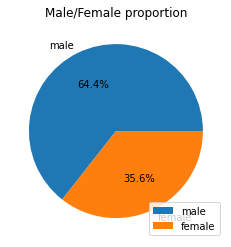

In [5]:
## 1. Create a pie chart presenting the male/female proportion
c=titanic_data["sex"].value_counts()
pie_chart=plt.pie(c,labels=c.index,autopct="%1.1f%%")
plt.title("Male/Female proportion")
plt.legend(loc='lower right')
plt.show()

age     0
fare    0
dtype: int64


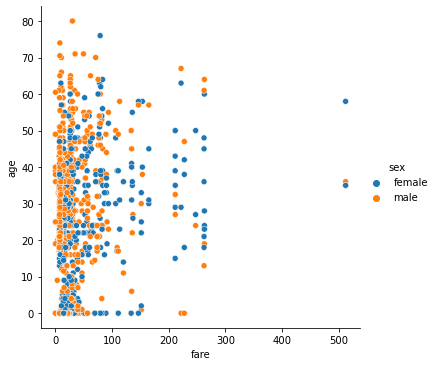

In [6]:
## 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
titanic_data[["age","fare"]]=titanic_data[["age","fare"]].fillna(0)
print(titanic_data[["age","fare"]].isna().sum())
sns.relplot(x="fare",y="age",data=titanic_data,hue="sex")

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

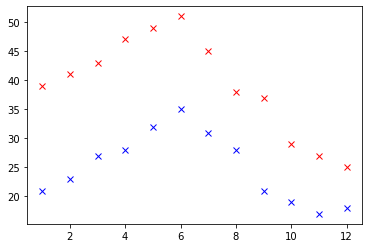

In [36]:
## Code reference :
## https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_curvefit_temperature_data.html

import numpy as np
import matplotlib.pyplot as plt
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
Months = np.arange(1,13)
plt.plot(Months,max_temp,'rx')
plt.plot(Months,min_temp,'bx')
#plt.xlabel('Month')
#plt.ylabel('temp')

In [46]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Months,
                                      max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Months,
                                      min_temp, [-50, 20, 0])

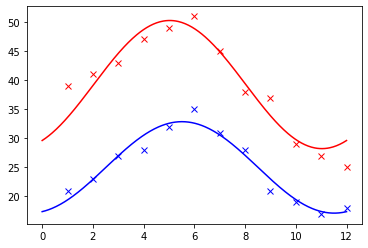

In [47]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Months, max_temp, 'rx')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Months, min_temp, 'bx')
plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.show()